# decision tree

(225, 2)


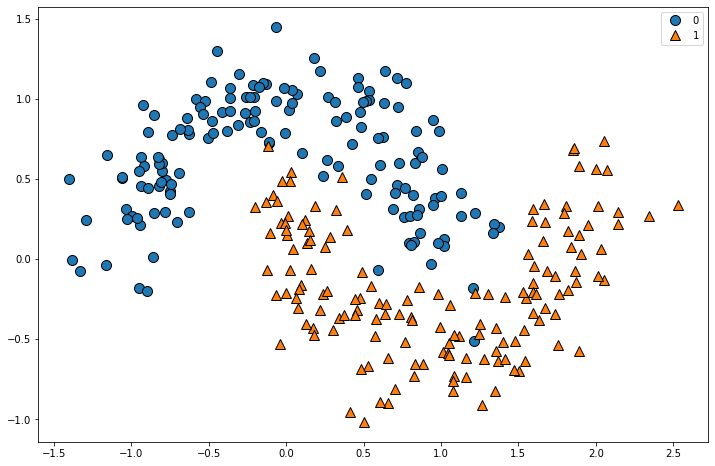

In [76]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import mglearn
from dtreeviz.trees import dtreeviz

moons = make_moons(n_samples=300, noise=0.2, random_state=0)
X = moons[0]
Y = moons[1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y)
print(X_train.shape)

plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend()
plt.show()

- input 変数の説明  
https://medium.com/micin-developers/decipher-github-dt-op-2c97aa362561

- 分割のアルゴリズム  
https://www.rm48.net/post/decisiontreeclassifier%E3%81%AE%E4%B8%AD%E3%82%92%E8%A6%8B%E3%81%A6%E3%81%BF%E3%82%8B

- sklearn Gini 説明  
https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php

In [77]:
clf_model = DecisionTreeClassifier(max_depth=2)
clf_model.fit(X_train, Y_train)
print(clf_model.score(X_test, Y_test))

0.8933333333333333


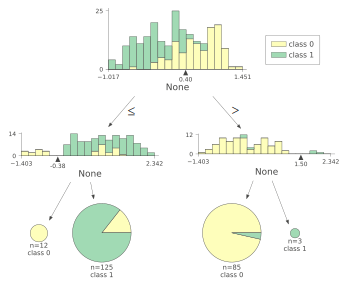

In [80]:
dtreeviz(clf_model, X_train, Y_train)

In [67]:
clf_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [68]:
clf_model.feature_importances_

array([0.28248644, 0.71751356])

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.402\ngini = 0.5\nsamples = 225\nvalue = [112, 113]'),
 Text(0.25, 0.5, 'X[0] <= -0.377\ngini = 0.342\nsamples = 137\nvalue = [30, 107]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.247\nsamples = 125\nvalue = [18, 107]'),
 Text(0.75, 0.5, 'X[0] <= 1.497\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.068\nsamples = 85\nvalue = [82, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

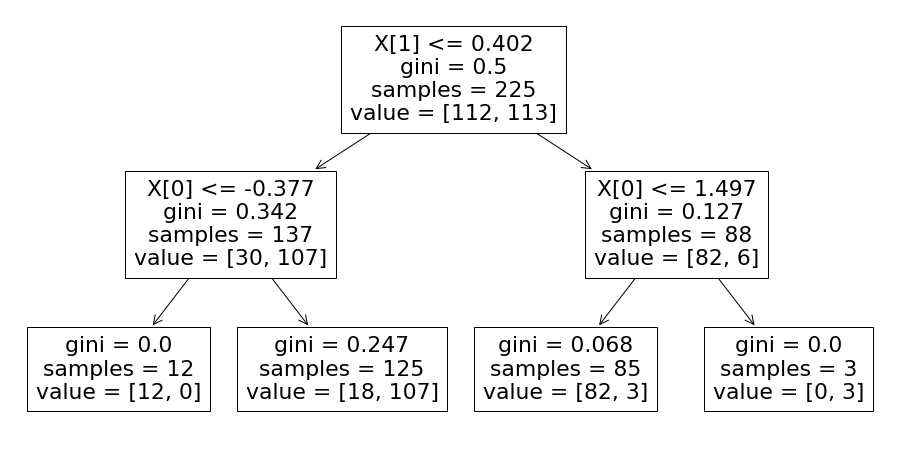

In [69]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
plot_tree(clf_model, ax=ax)

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.402\ngini = 0.5\nsamples = 225\nvalue = [112, 113]'),
 Text(0.25, 0.5, 'X[0] <= -0.377\ngini = 0.342\nsamples = 137\nvalue = [30, 107]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.247\nsamples = 125\nvalue = [18, 107]'),
 Text(0.75, 0.5, 'X[0] <= 1.497\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.068\nsamples = 85\nvalue = [82, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

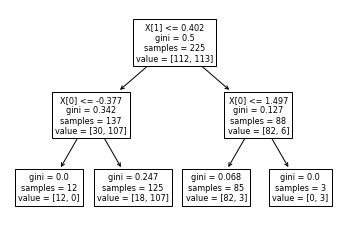

In [70]:

tree.plot_tree(clf_model)

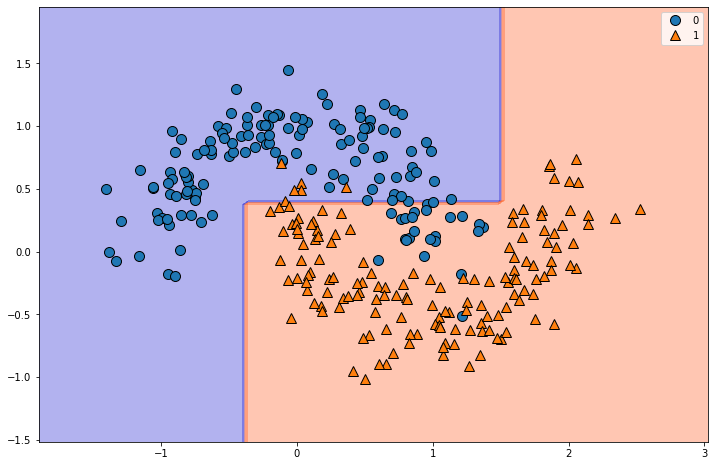

In [71]:
plt.figure(figsize=(12, 8))
_x1 = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
_x2 = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
x1, x2 = np.meshgrid(_x1, _x2)
X_stack = np.hstack((x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1, 1)))
y_pred = clf_model.predict(X_stack).reshape(x1.shape)
custom_cmap = ListedColormap(['mediumblue', 'orangered'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend()
plt.show()

(200, 1)


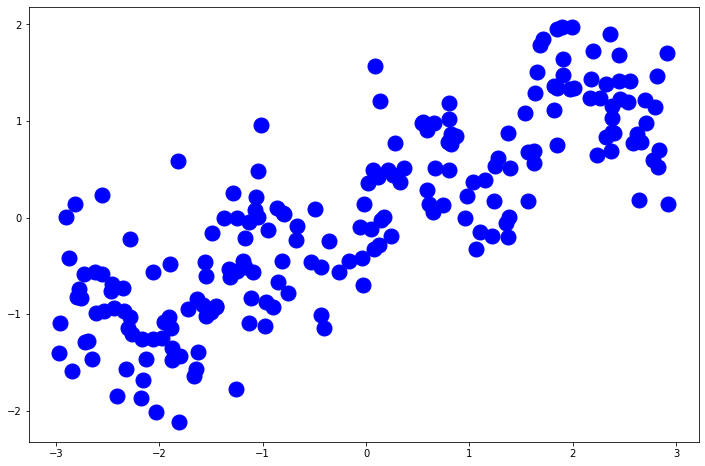

In [47]:
import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)
print(X.shape)

plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'bo', ms=15)
plt.show()

In [14]:
tree_reg_model = DecisionTreeRegressor(max_depth=3)
tree_reg_model.fit(X, Y)
print(tree_reg_model.score(X, Y))

0.7755211625482443


In [15]:
dot_data = export_graphviz(tree_reg_model)
graph = graphviz.Source(dot_data)
graph.render('wave-tree', format='png')

'wave-tree.png'

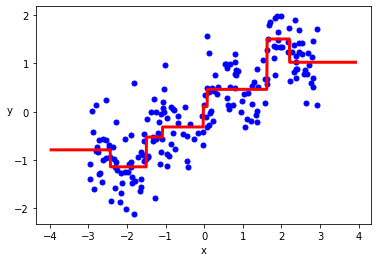

In [16]:
X1 = np.linspace(X.min() - 1, X.max() + 1, 1000).reshape(-1, 1)
y_pred = tree_reg_model.predict(X1)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10, rotation=-0)
plt.plot(X, Y, 'bo', ms=5)
plt.plot(X1, y_pred, 'r-', linewidth=3)
plt.show()

In [15]:
import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)

tree_reg_model_2 = DecisionTreeRegressor()

tree_reg_model_2.fit(X, Y)

print(tree_reg_model_2.score(X, Y))

1.0


In [16]:
def graph_export(model):
    dot_data = export_graphviz(model)
    graph = graphviz.Source(dot_data)
    graph.render('test', format='png')

graph_export(tree_reg_model_2)

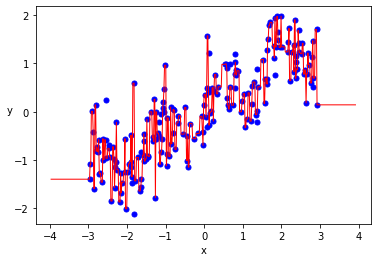

In [17]:
def plot_regression_predictions(tree_reg, x, y):
    x1 = np.linspace(x.min() - 1, x.max() + 1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x', fontsize=10)
    plt.ylabel('y', fontsize=10, rotation=-0)
    plt.plot(x, y, 'bo', ms=5)
    plt.plot(x1, y_pred, 'r-', linewidth=1)
    plt.show()


plot_regression_predictions(tree_reg_model_2, X, Y)